# ECON526: Assignment 4

## Student Name/Number: (doubleclick to edit)

### Instructions

-   Ensure you modify the field above with your **name and student
    number above immediately**
-   Modify directly and save as the `.ipynb`, and submit directly. Do
    not export to PDF or HTML, and leave the filename as is. Canvas will
    automatically append your name to the filename.
-   Submit directly to canvas as a `.ipynb` file.

## Setup

Feel free to use the following packages (and we have added a few
convenience imports)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from numpy.linalg import cond, matrix_rank, norm
from scipy.linalg import inv, solve, det, eig, lu, eigvals
from sklearn.metrics import confusion_matrix

# Q1

Take the following code from our PCA examples in class:

In [2]:
N = 50 # number of observations
L, M = 2, 3 # number of latent and observed factors
Z = np.random.randn(N, L) # latent factors
F = np.array([[1.0, 0.05], # X_1 = Z_1 + 0.05 Z_2
              [2.0, 0.0], # X_2 = 2 Z_1
              [3.0, 0.1]]) # X_3 = 3 Z_1 + 0.1 Z_2
X = Z @ F.T + 0.1 * np.random.randn(N, M) # added noise
pca = PCA(n_components=2) # one less, and correctly specified
Z_hat = pca.fit_transform(X) # transformed by dropping last factor
# Scale and sign may not match due to indeterminacy
print(f"Correlation of Z_1 to Z_hat_1 = {np.corrcoef(Z.T, Z_hat.T)[0,2]}")
print(f"Correlation of Z_2 to Z_hat_2 = {np.corrcoef(Z.T, Z_hat.T)[1,3]}")

Correlation of Z_1 to Z_hat_1 = -0.9993288763718938
Correlation of Z_2 to Z_hat_2 = 0.3969207044136635

# Q1.1

We said that it was doing a terrible job at separating out the 2nd from
the 3rd latent factor. Can you show code to demonstrate this and then
provide a description of why you think it is happening?

In [3]:
# Your code here

**(double click to add an explanation here)**

# Q1.2

Change the $F$ matrix in our previous code - leave the noise and other
parameters intact - to make it so that it is more clearly a data
generating process with 2 latent factors as is specified. Hint: get
better separation between 2nd and 3rd singular values

In [5]:
# Your code and explanation here

# Q1.3

This example contains the same $F$ as the original.

In [7]:
N = 50 # number of observations
L, M = 2, 3 # number of latent and observed factors
Z = np.random.randn(N, L) # latent factors
F = np.array([[1.0, 0.05], # X_1 = Z_1 + 0.05 Z_2
              [2.0, 0.0], # X_2 = 2 Z_1
              [3.0, 0.1]]) # X_3 = 3 Z_1 + 0.1 Z_2
X_new = Z @ F.T + 1e-16 * np.random.randn(N, M) 
print(PCA(n_components=3).fit(X_new).singular_values_)
print(PCA(n_components=3).fit(X_new).explained_variance_ratio_)

[3.09820150e+01 3.51428933e-01 1.56859240e-15]
[9.99871353e-01 1.28647051e-04 2.56297883e-33]

Give an explanation for the key differences of these results compared to
our baseline

**(double click to add an explanation here)**

## Q2.1

The clustering example we gave in class worked quite well. Modify the
example to make it perform worse and briefly explain why

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


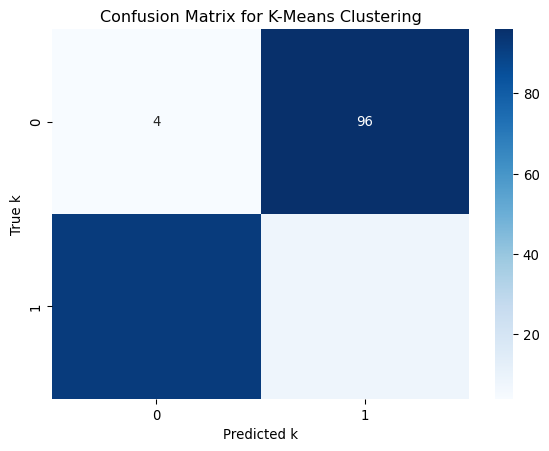

In [8]:
# Modify this directly for your example
mu_1 = np.array([0.0, 0.0]) # mean of k=1
mu_2 = np.array([1.0, 1.0]) # mean of k=2
sigma = np.array([[0.2, 0], [0, 0.2]]) # use same variance
N = 100 # observations
X_1 = np.random.multivariate_normal(mu_1, sigma, N)
X_2 = np.random.multivariate_normal(mu_2, sigma, N)
df_1 = pd.DataFrame({"f1": X_1[:, 0], "f2": X_1[:, 1], "k": 1})
df_2 = pd.DataFrame({"f1": X_2[:, 0], "f2": X_2[:, 1], "k": 2})
df = pd.concat([df_1, df_2], ignore_index=True)
kmeans = KMeans(n_clusters=2, random_state=0)
df["k_hat"] = kmeans.fit_predict(df[["f1", "f2"]]) + 1
cm = confusion_matrix(df["k"], df["k_hat"])
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted k')
plt.ylabel('True k')
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

## Q2.2

Repeat the same thing as Q2.1, but change a different parameter to make
it perform worse in a different way. Briefly explain why

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


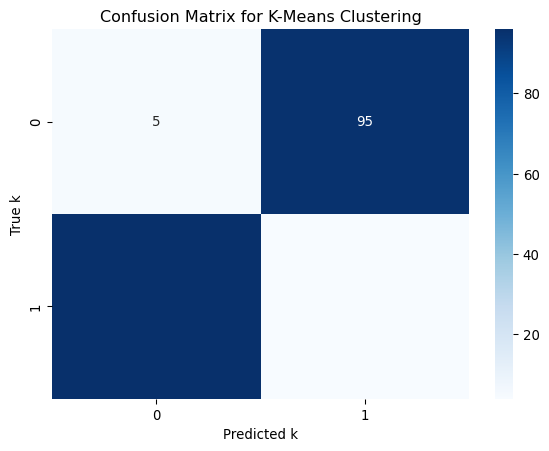

In [10]:
# Modify this directly for your example
mu_1 = np.array([0.0, 0.0]) # mean of k=1
mu_2 = np.array([1.0, 1.0]) # mean of k=2
sigma = np.array([[0.2, 0], [0, 0.2]]) # use same variance
N = 100 # observations
X_1 = np.random.multivariate_normal(mu_1, sigma, N)
X_2 = np.random.multivariate_normal(mu_2, sigma, N)
df_1 = pd.DataFrame({"f1": X_1[:, 0], "f2": X_1[:, 1], "k": 1})
df_2 = pd.DataFrame({"f1": X_2[:, 0], "f2": X_2[:, 1], "k": 2})
df = pd.concat([df_1, df_2], ignore_index=True)
kmeans = KMeans(n_clusters=2, random_state=0)
df["k_hat"] = kmeans.fit_predict(df[["f1", "f2"]]) + 1
cm = confusion_matrix(df["k"], df["k_hat"])
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted k')
plt.ylabel('True k')
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

# Q3.2

Take the following example of generated data and latents

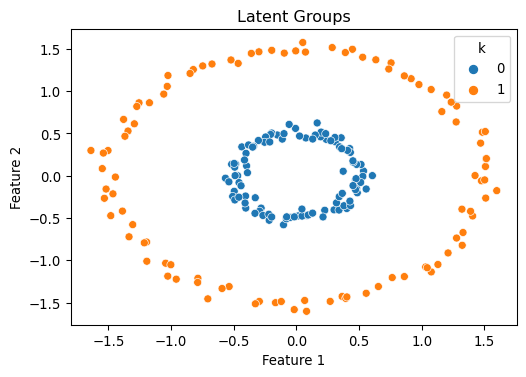

In [12]:
def generate_noisy_circle(radius, num_points, noise_std):
    theta = np.linspace(0, 2*np.pi, num_points)
    x = radius * np.cos(theta) + np.random.normal(0, noise_std, num_points)
    y = radius * np.sin(theta) + np.random.normal(0, noise_std, num_points)
    return np.column_stack((x, y))

# Generate data for inner and outer circles
X_1 = generate_noisy_circle(0.5, 100, 0.05)
X_2 = generate_noisy_circle(1.5, 100, 0.05)

# Create dataframes
df_1 = pd.DataFrame({"f1": X_1[:, 0], "f2": X_1[:, 1], "k": 0})
df_2 = pd.DataFrame({"f1": X_2[:, 0], "f2": X_2[:, 1], "k": 1})
df = pd.concat([df_1, df_2], ignore_index=True)
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df, x="f1", y="f2", hue="k", ax=ax)
ax.set(xlabel="Feature 1", ylabel="Feature 2", title="Latent Groups")
plt.show()

Note that the `k=0` and `k=1` state are fully separated and the
difference is visually obvious. Now lets perform k-means clustering

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


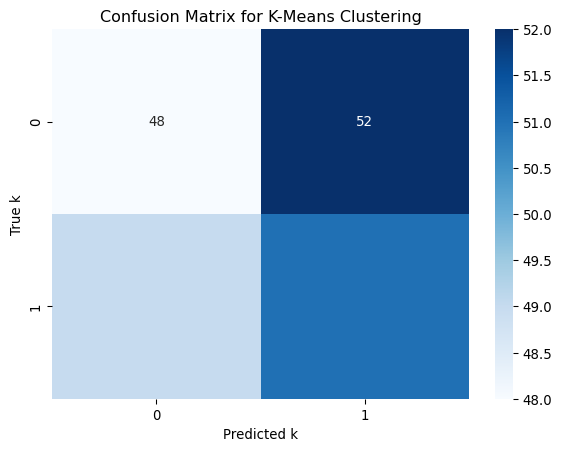

In [13]:
kmeans = KMeans(n_clusters=2, random_state=0)
df["k_hat"] = kmeans.fit_predict(df[["f1", "f2"]])

# Create confusion matrix
cm = confusion_matrix(df["k"], df["k_hat"])

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted k')
plt.ylabel('True k')
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

Can you explain why this was a failure using your knowledge of k-means
clustering? Be precise if possible.

**(double click to add an explanation here)**

But all is not lost! Look at the results of the following code which
uses a different algorithm

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


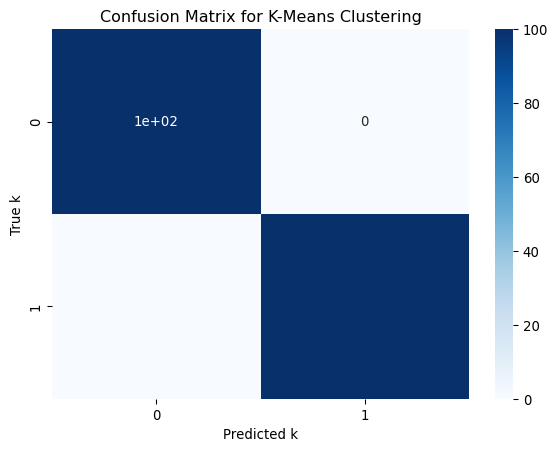

In [14]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)
df["k_hat"] = spectral_clustering.fit_predict(df[["f1", "f2"]])

# Create confusion matrix
cm = confusion_matrix(df["k"], df["k_hat"])
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted k')
plt.ylabel('True k')
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

Lookup [spectral
clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)
in skikit-learn docs, etc. and provide a 2 sentence summary of why this
worked.

**(double click to add your explanation of why spectral clustering
worked)**

# Q4

Consider the following map

$$
x_{t+1} = f(x_t) = a x_t^2 + (1-a)
$$

Where we will assume that $a=\frac{3}{4}$. The code below comes from the
lecture notes, and can be used to simulate this map

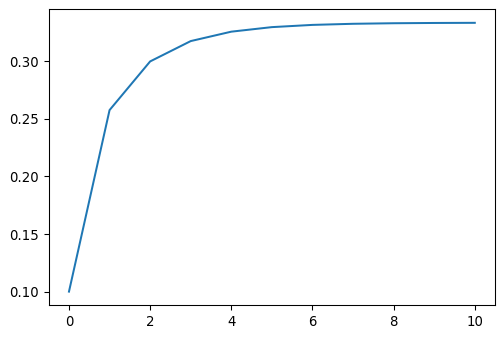

In [15]:
def simulate(f, X_0, T):
    X = np.zeros((1, T+1))
    X[:,0] = X_0
    for t in range(T):
        X[:,t+1] = f(X[:,t])
    return X
def f(x, a):
    return a * x**2 + (1-a)
T = 10
x_0 = 0.1
X = simulate(lambda x : f(x, 3/4), x_0, T) # use a=3/4
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(range(T+1), X.T)

# Q4.1

If I solve the equation $x^* = f(x^*)$ for $x^*$ using the quadratic
formula you get the following:

In [16]:
def x_star(a):
  return [(1 + np.sqrt(1 - 4 * a*(1-a)))/(2*a),(1 - np.sqrt(1 - 4 * a*(1-a)))/(2*a)]  
print(f"x^* = {x_star(3/4)}")

x^* = [1.0, 0.3333333333333333]

Adjust the above code to simulate up to $T=5$ from $x_0 = 0.9$ and
$x_0 = 1.1$ and plot the results.

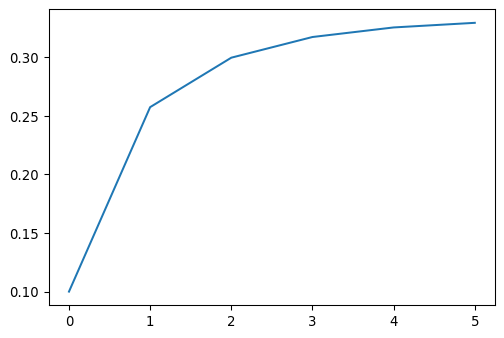

In [17]:
# Modify this code
T = 5
X = simulate(lambda x : f(x, 3/4), x_0, T) # use a=3/4
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(range(T+1), X.T)

What do you notice about this and how do you intepret the different
behavior for various $x_0$?

**(double click to add your explanation)**

# Q4.3

See the graph below with $x_0 = 1.0$ and a very large $T$.

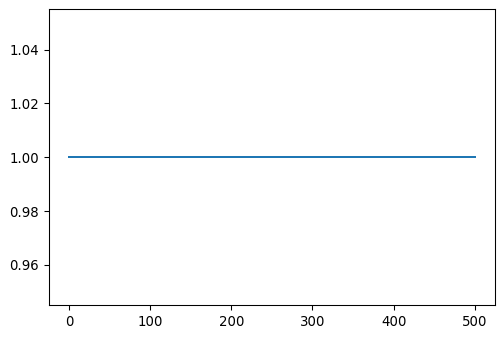

In [19]:
T = 500
X = simulate(lambda x : f(x, 3/4), 1.0, T)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(range(T+1), X.T)

And $x_0 = 1 + 10^{-15}$ and even a smaller $T$

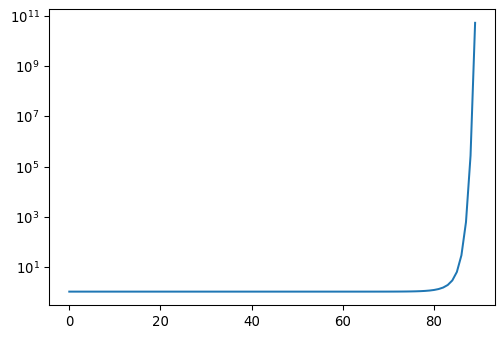

In [20]:
T = 89
X = simulate(lambda x : f(x, 3/4), 1 + 1e-15, T)
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_yscale('log')
ax.plot(range(T+1), X.T)

Notice the `log` scale on the axis. Briefly interpret these results

**(double click to add your interpretation)**

# Q5

Find some economic or financial data on the web of your choice

1.  Download it and load it into a pandas dataframe
2.  Either run PCA or k-means clustering on the data
3.  Briefly intrepret the results in whatever way you wish

We are not giving you a list of possible datasources because we want you
to explore to look for interesting sources of data.

The economic rational for looking for the dimension reduction or the
clustering doesn’t need to be especially tight, but do your best to
explain why you ran the particular specification.

For the data, post a link to where you found it but: no need to have it
automatically downloaded in the notebook, and no need to post it up with
your problem set.

In [21]:
# Your code here

**(double click to add a brief interpretation or summary)**